<a href="https://colab.research.google.com/github/Gudisetla-mahesh/Gudisetla-mahesh/blob/main/phishing_website_detection_random_forest_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. import the dataset and libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
raw_dataset = pd.read_csv("/content/sample_data/dataset_phishing (1).csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. inspect the dataset

In [ ]:
raw_dataset.shape

(11430, 89)

In [ ]:
raw_dataset.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...   empty_title  domain_in_title  \
count  11430.000000  ...  11430.000000     11430.000000   
mean       0.293176  ...      0.124759         0.775853   
std        0.998317  ...      0.330460         0.417038   
min        0.000000  ...      0.000000         0.000000   
25%        0.000000  ...      0.000000         1.000000   
50%        0.000000  ...      0.000000         1.000000   
75%        0.000000  ...      0.000000         1.000000   
max       19.000000  ...      1.000000         1.000000   

       domain_with_copyright  whois_registered_domain  \
count           11430.000000             11430.000000   
mean                0.439545                 0.072878   
std                 0.496353                 0.259948   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 1.000000                 0.000000   
max                 1.000000                 1.000000   

       domain_registration_length    domain_age   web_traffic    dns_record  \
count                11430.000000  11430.000000  1.143000e+04  11430.000000   
mean                   492.532196   4062.543745  8.567566e+05      0.020122   
std                    814.769415   3107.784600  1.995606e+06      0.140425   
min                     -1.000000    -12.000000  0.000000e+00      0.000000   
25%                     84.000000    972.250000  0.000000e+00      0.000000   
50%                    242.000000   3993.000000  1.651000e+03      0.000000   
75%                    449.000000   7026.750000  3.738455e+05      0.000000   
max                  29829.000000  12874.000000  1.076799e+07      1.000000   

       google_index     page_rank  
count  11430.000000  11430.000000  
mean       0.533946      3.185739  
std        0.498868      2.536955  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        1.000000      3.000000  
75%        1.000000      5.000000  
max        1.000000     10.000000  

[8 rows x 87 columns]

* outliers at max values: nb_dots, nb_hyphens, nb_at, nb_qm, nb_and,nb_eq, domain_registration_length, domain_age
* target = legitimate/phishing

In [ ]:
pd.set_option('display.max_rows', 500)
raw_dataset.isna().sum()
# no missing values

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_subdomain              0
abnormal_subdomain            0
nb_subdomains                 0
prefix_suffix                 0
random_domain                 0
shortening_service            0
path_extension                0
nb_redirection                0
nb_external_redirection       0
length_words_raw              0
char_repeat                   0
shortest_words_raw            0
shortest_word_host            0
shortest_word_path            0
longest_words_raw             0
longest_word_host             0
longest_word_path             0
avg_words_raw                 0
avg_word_host                 0
avg_word_path                 0
phish_hints                   0
domain_in_brand               0
brand_in_subdomain            0
brand_in_path                 0
suspecious_tld                0
statistical_report            0
nb_hyperlinks                 0
ratio_intHyperlinks           0
ratio_extHyperlinks           0
ratio_nullHyperlinks          0
nb_extCSS                     0
ratio_intRedirection          0
ratio_extRedirection          0
ratio_intErrors               0
ratio_extErrors               0
login_form                    0
external_favicon              0
links_in_tags                 0
submit_email                  0
ratio_intMedia                0
ratio_extMedia                0
sfh                           0
iframe                        0
popup_window                  0
safe_anchor                   0
onmouseover                   0
right_clic                    0
empty_title                   0
domain_in_title               0
domain_with_copyright         0
whois_registered_domain       0
domain_registration_length    0
domain_age                    0
web_traffic                   0
dns_record                    0
google_index                  0
page_rank                     0
status                        0
dtype: int64

In [ ]:
# pd.reset_option('display.max_rows')

In [ ]:
original_dataset = raw_dataset.copy()

##### 2.1 inspect correlation and determine important features

In [ ]:
class_map = {'legitimate':0, 'phishing':1}
original_dataset['status'] = original_dataset['status'].map(class_map)

In [ ]:
numeric_dataset = original_dataset.select_dtypes(include=['int', 'float'])
corr_matrix = numeric_dataset.corr()

In [ ]:
# corr_matrix = original_dataset.corr()

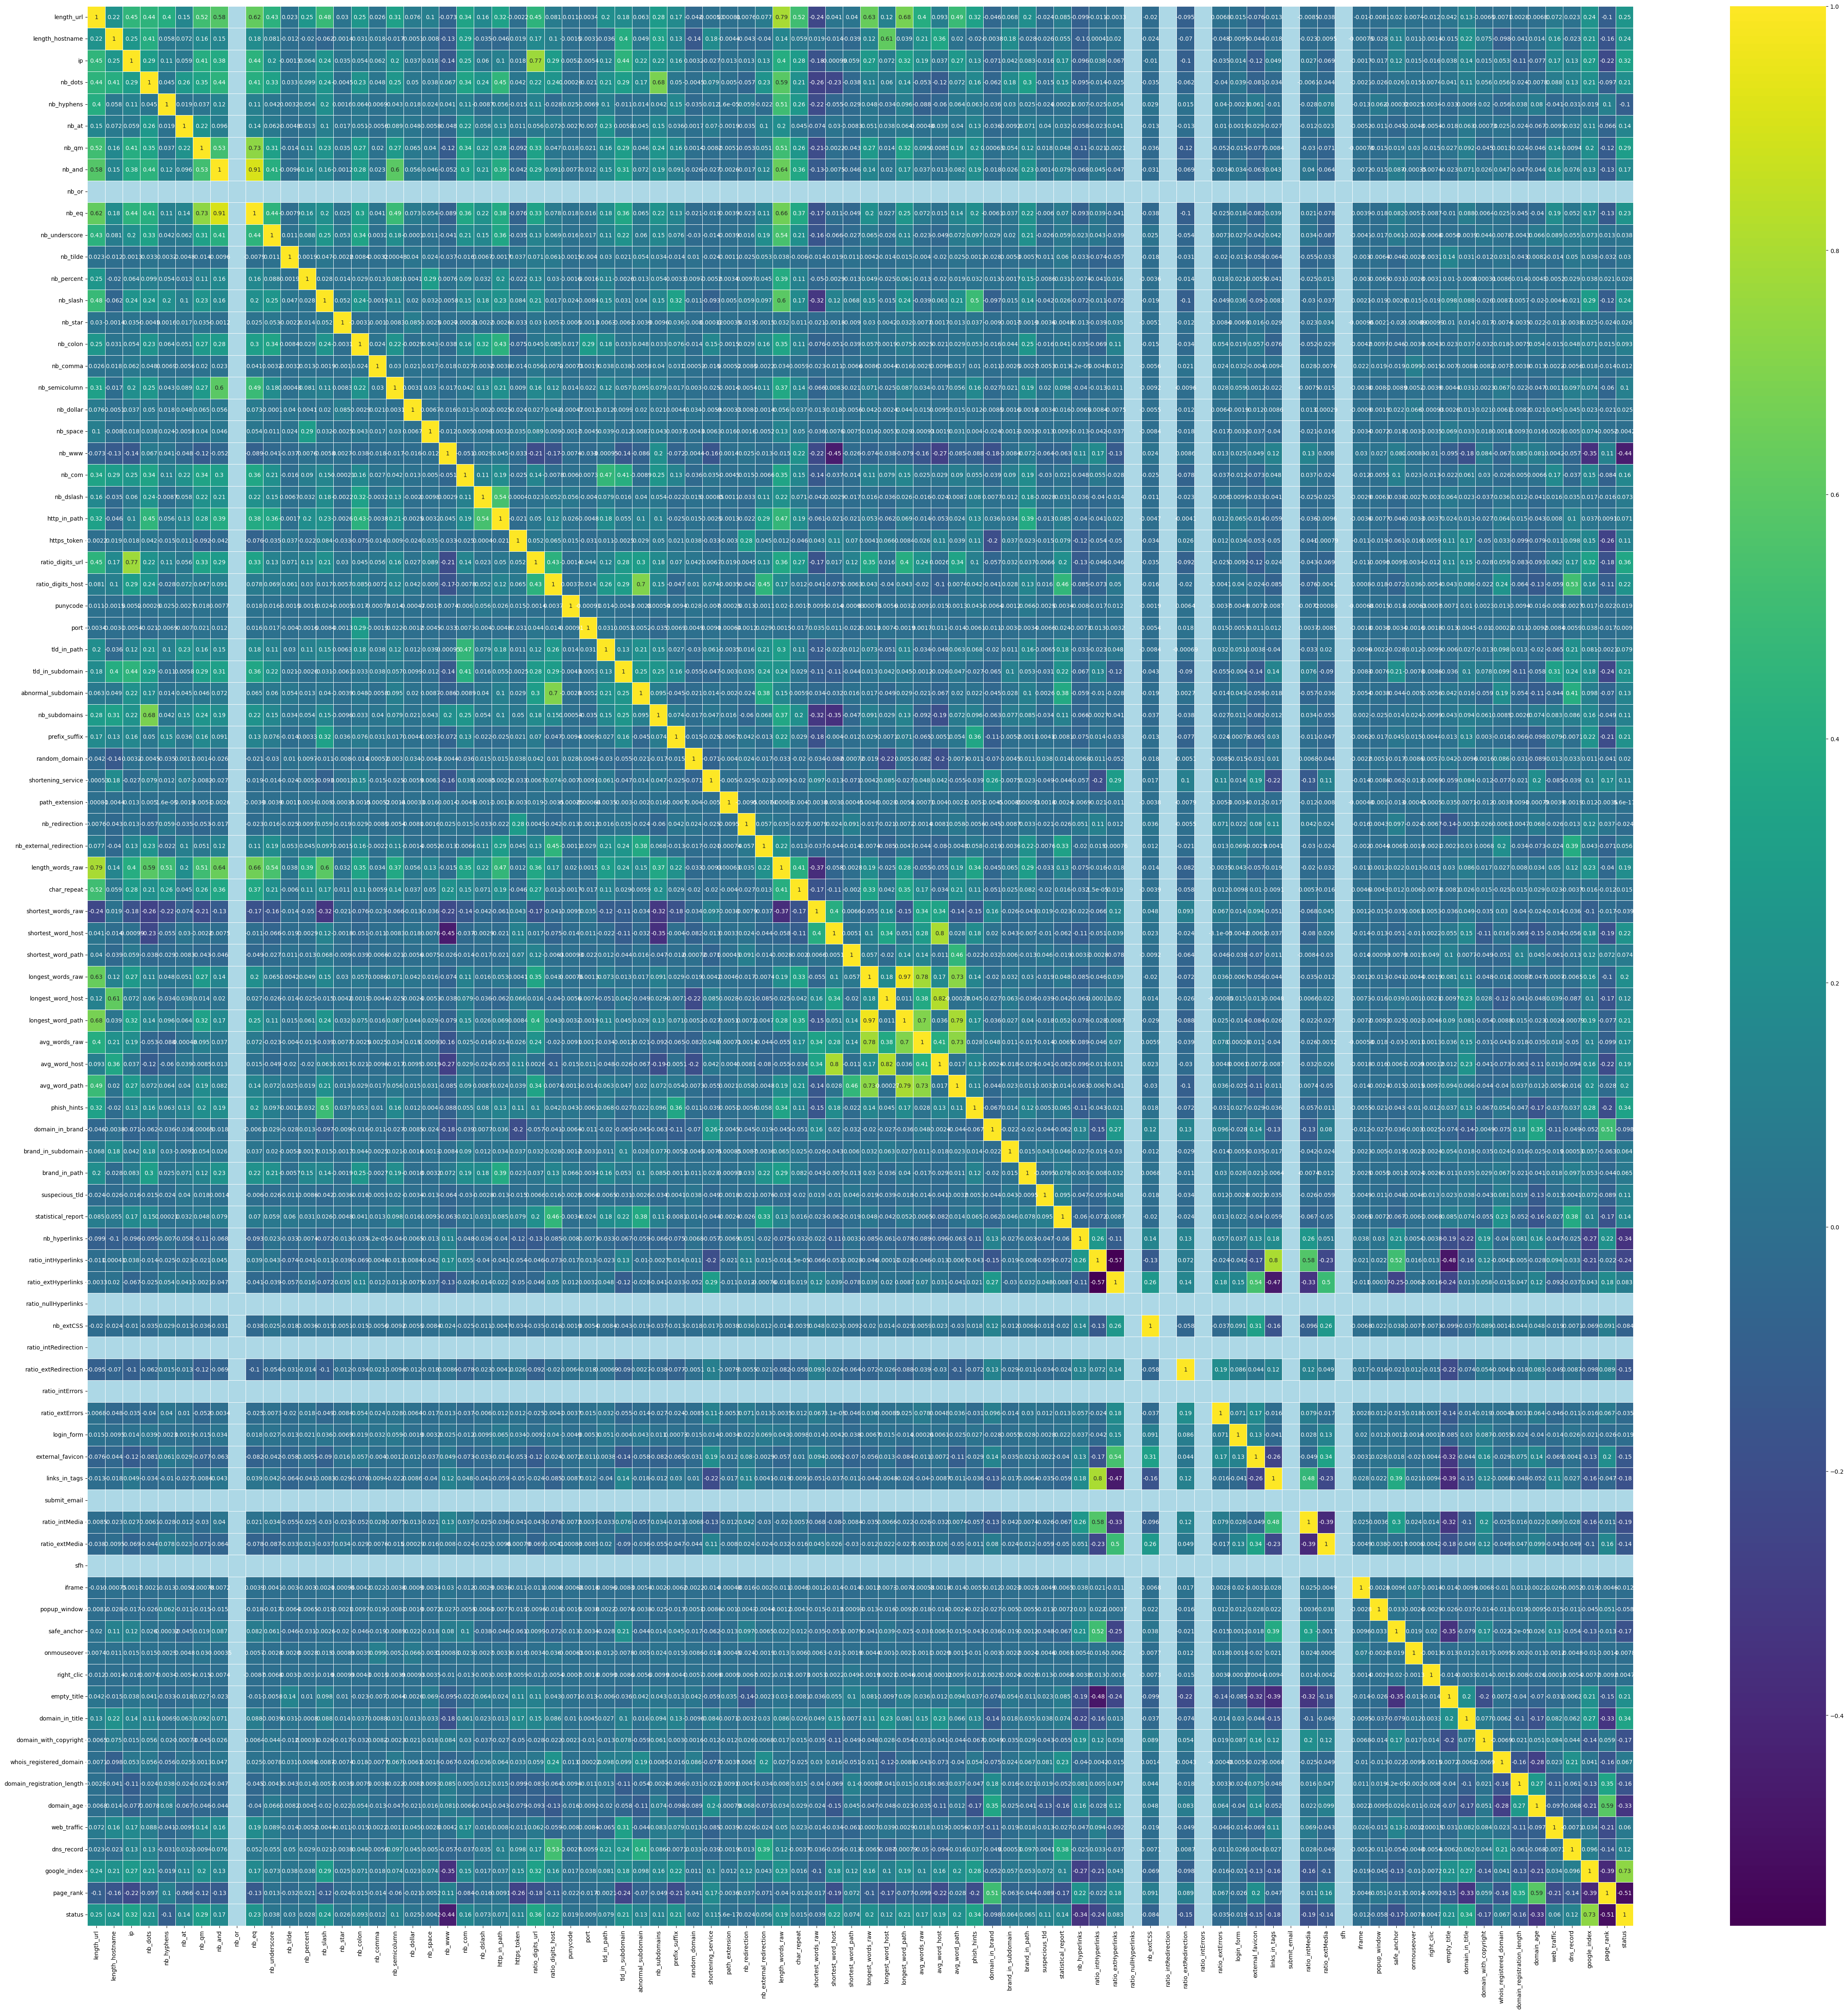

In [ ]:
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue')
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()

In [ ]:
corr_matrix.shape

(88, 88)

In [ ]:
corr_matrix['status']
#same as corr_matrix.iloc[[87]].T
# last column and last row are the same

length_url                    2.485805e-01
length_hostname               2.383224e-01
ip                            3.216978e-01
nb_dots                       2.070288e-01
nb_hyphens                   -1.001075e-01
nb_at                         1.429146e-01
nb_qm                         2.943191e-01
nb_and                        1.705464e-01
nb_or                                  NaN
nb_eq                         2.333863e-01
nb_underscore                 3.809134e-02
nb_tilde                      3.014233e-02
nb_percent                    2.810129e-02
nb_slash                      2.422700e-01
nb_star                       2.646512e-02
nb_colon                      9.283531e-02
nb_comma                      1.186465e-02
nb_semicolumn                 1.035541e-01
nb_dollar                     2.496206e-02
nb_space                     -4.193222e-03
nb_www                       -4.434677e-01
nb_com                        1.562835e-01
nb_dslash                     7.260234e-02
http_in_path                  7.077624e-02
https_token                   1.146691e-01
ratio_digits_url              3.563946e-01
ratio_digits_host             2.243349e-01
punycode                      1.871039e-02
port                          9.011116e-03
tld_in_path                   7.914651e-02
tld_in_subdomain              2.088842e-01
abnormal_subdomain            1.281598e-01
nb_subdomains                 1.128907e-01
prefix_suffix                 2.146807e-01
random_domain                 1.963062e-02
shortening_service            1.061200e-01
path_extension                5.592660e-17
nb_redirection               -2.440520e-02
nb_external_redirection       5.620994e-02
length_words_raw              1.920105e-01
char_repeat                   1.473217e-02
shortest_words_raw           -3.936361e-02
shortest_word_host            2.230840e-01
shortest_word_path            7.436495e-02
longest_words_raw             2.001466e-01
longest_word_host             1.245156e-01
longest_word_path             2.127091e-01
avg_words_raw                 1.675637e-01
avg_word_host                 1.935017e-01
avg_word_path                 1.972561e-01
phish_hints                   3.353927e-01
domain_in_brand              -9.822216e-02
brand_in_subdomain            6.425702e-02
brand_in_path                 6.515575e-02
suspecious_tld                1.100896e-01
statistical_report            1.439435e-01
nb_hyperlinks                -3.426283e-01
ratio_intHyperlinks          -2.439821e-01
ratio_extHyperlinks           8.335725e-02
ratio_nullHyperlinks                   NaN
nb_extCSS                    -8.356663e-02
ratio_intRedirection                   NaN
ratio_extRedirection         -1.508267e-01
ratio_intErrors                        NaN
ratio_extErrors              -3.470251e-02
login_form                   -1.900010e-02
external_favicon             -1.465654e-01
links_in_tags                -1.844011e-01
submit_email                           NaN
ratio_intMedia               -1.933331e-01
ratio_extMedia               -1.404059e-01
sfh                                    NaN
iframe                       -1.208332e-02
popup_window                 -5.760197e-02
safe_anchor                  -1.733973e-01
onmouseover                  -7.787061e-03
right_clic                    4.680056e-03
empty_title                   2.070428e-01
domain_in_title               3.428070e-01
domain_with_copyright        -1.730985e-01
whois_registered_domain       6.697907e-02
domain_registration_length   -1.617188e-01
domain_age                   -3.318891e-01
web_traffic                   6.038772e-02
dns_record                    1.221190e-01
google_index                  7.311708e-01
page_rank                    -5.111371e-01
status                        1.000000e+00
Name: status, dtype: float64

In [ ]:
status_corr = corr_matrix['status']
status_corr.shape

(88,)

In [ ]:
def feature_selector_correlation(cmatrix, threshold):

    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score))
    return result

In [ ]:
features_selected = feature_selector_correlation(status_corr, 0.2)
features_selected

[('length_url', ['0.248580']),
 ('length_hostname', ['0.238322']),
 ('ip', ['0.321698']),
 ('nb_dots', ['0.207029']),
 ('nb_qm', ['0.294319']),
 ('nb_eq', ['0.233386']),
 ('nb_slash', ['0.242270']),
 ('nb_www', ['-0.443468']),
 ('ratio_digits_url', ['0.356395']),
 ('ratio_digits_host', ['0.224335']),
 ('tld_in_subdomain', ['0.208884']),
 ('prefix_suffix', ['0.214681']),
 ('shortest_word_host', ['0.223084']),
 ('longest_words_raw', ['0.200147']),
 ('longest_word_path', ['0.212709']),
 ('phish_hints', ['0.335393']),
 ('nb_hyperlinks', ['-0.342628']),
 ('ratio_intHyperlinks', ['-0.243982']),
 ('empty_title', ['0.207043']),
 ('domain_in_title', ['0.342807']),
 ('domain_age', ['-0.331889']),
 ('google_index', ['0.731171']),
 ('page_rank', ['-0.511137']),
 ('status', ['1.000000'])]

### 3. Preprocessing

#### 3.1 setup predictors and targets

In [ ]:
selected_features = [i for (i,j) in features_selected if i != 'status']
selected_features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

In [ ]:
X_selected = original_dataset[selected_features]
X_selected

length_url  length_hostname  ip  nb_dots  nb_qm  nb_eq  nb_slash  \
0              37               19   0        3      0      0         3   
1              77               23   1        1      0      0         5   
2             126               50   1        4      1      3         5   
3              18               11   0        2      0      0         2   
4              55               15   0        2      0      0         5   
...           ...              ...  ..      ...    ...    ...       ...   
11425          45               17   0        2      0      0         4   
11426          84               18   0        5      1      1         5   
11427         105               16   1        2      1      1         5   
11428          38               30   0        2      0      0         3   
11429         477               14   1       24      1      9         4   

       nb_www  ratio_digits_url  ratio_digits_host  ...  longest_words_raw  \
0           1          0.000000           0.000000  ...                 11   
1           0          0.220779           0.000000  ...                 32   
2           0          0.150794           0.000000  ...                 17   
3           0          0.000000           0.000000  ...                  5   
4           1          0.000000           0.000000  ...                 11   
...       ...               ...                ...  ...                ...   
11425       1          0.000000           0.000000  ...                 11   
11426       1          0.023810           0.000000  ...                 10   
11427       1          0.142857           0.000000  ...                 15   
11428       1          0.000000           0.000000  ...                 22   
11429       1          0.085954           0.785714  ...                 12   

       longest_word_path  phish_hints  nb_hyperlinks  ratio_intHyperlinks  \
0                      6            0             17             0.529412   
1                     32            0             30             0.966667   
2                     17            0              4             1.000000   
3                      0            0            149             0.973154   
4                     11            0            102             0.470588   
...                  ...          ...            ...                  ...   
11425                 11            0            199             0.884422   
11426                  8            0              3             1.000000   
11427                 15            0             68             0.470588   
11428                  0            0             32             0.375000   
11429                 12            3             21             0.428571   

       empty_title  domain_in_title  domain_age  google_index  page_rank  
0                0                0          -1             1          4  
1                0                1        5767             1          2  
2                0                1        4004             1          0  
3                0                1          -1             0          3  
4                0                0        8175             0          6  
...            ...              ...         ...           ...        ...  
11425            0                0        5396             0          6  
11426            0                1        6728             1          0  
11427            0                0        8515             1         10  
11428            0                1        2836             0          4  
11429            0                1          -1             1          0  

[11430 rows x 23 columns]

In [ ]:
X_selected.shape

(11430, 23)

In [ ]:
X_selected.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_eq',
       'nb_slash', 'nb_www', 'ratio_digits_url', 'ratio_digits_host',
       'tld_in_subdomain', 'prefix_suffix', 'shortest_word_host',
       'longest_words_raw', 'longest_word_path', 'phish_hints',
       'nb_hyperlinks', 'ratio_intHyperlinks', 'empty_title',
       'domain_in_title', 'domain_age', 'google_index', 'page_rank'],
      dtype='object')

In [ ]:
y = original_dataset['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

#### 3.2 train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

### 4. model fitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42,
                                            )

In [ ]:
model_random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):

    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)


    if train:
        x = X_train
        y = y_train
    elif not train:
        x = X_test
        y = y_test

    y_predicted = model.predict(x)

    accuracy = accuracy_score(y, y_predicted)
    print('model accuracy: {0:4f}'.format(accuracy))
    oconfusion_matrix = confusion_matrix(y, y_predicted)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    oroc_auc_score = lb.transform(y), lb.transform(y_predicted)

### 5. evaluating accuracy

In [ ]:
# train accuracy

custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=True)

model accuracy: 1.000000
Confusion matrix: 
 [[4558    0]
 [   0 4586]]


In [ ]:
# test accuracy

custom_accuracy_set(model_random_forest, X_train, X_test, y_train, y_test, train=False)

model accuracy: 0.965004
Confusion matrix: 
 [[1118   39]
 [  41 1088]]


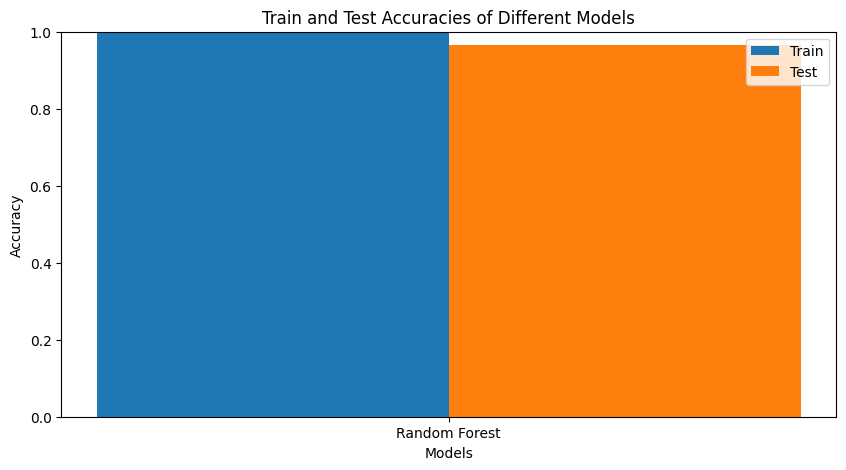

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Define the models and their names
models = [model_random_forest]
model_names = ['Random Forest']

# Calculate accuracies for each model
train_accuracies = []
test_accuracies = []

for model in models:
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 5))

bar_width = 0.3
index = np.arange(len(model_names))

plt.bar(index - bar_width/2, train_accuracies, bar_width, label='Train')
plt.bar(index + bar_width/2, test_accuracies, bar_width, label='Test')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies of Different Models')
plt.xticks(index, model_names)
plt.legend()
plt.ylim(0, 1)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

# Initialize the scaler
scaler = StandardScaler()

# Initialize the models with a higher max_iter for logistic regression
model_random_forest = RandomForestClassifier(n_estimators=350, random_state=42)
model_xgb = XGBClassifier(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_knn = KNeighborsClassifier()
model_lr = make_pipeline(scaler, LogisticRegression(random_state=42, max_iter=1000))
model_gnb = GaussianNB()
model_lda = LinearDiscriminantAnalysis()

# List of models and their names for easier iteration
models = [
    model_random_forest,
    model_xgb,
    model_dt,
    model_knn,
    model_lr,  # Logistic Regression with scaling
    model_gnb,
    model_lda
]
model_names = [
    'Random Forest',
    'XGBoost',
    'Decision Tree',
    'KNN',
    'Logistic Regression',
    'Gaussian Naive Bayes',
    'Linear Discriminant Analysis'
]

# Train and evaluate each model
train_accuracies = []
test_accuracies = []

for model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the training and test data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate and store the accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


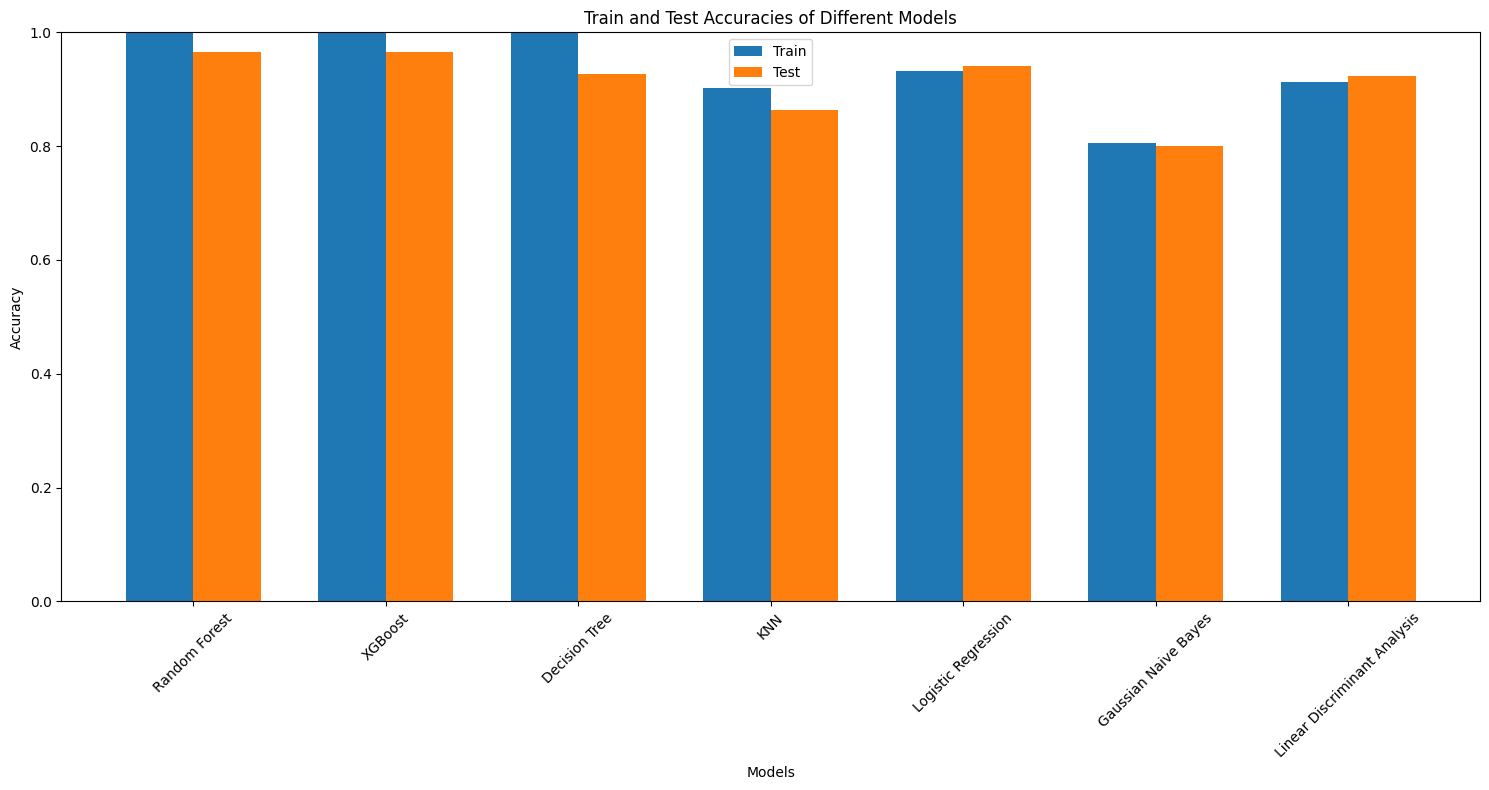

In [ ]:
# Plotting the accuracies
plt.figure(figsize=(15, 8))
bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index - bar_width/2, train_accuracies, bar_width, label='Train')
plt.bar(index + bar_width/2, test_accuracies, bar_width, label='Test')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies of Different Models')
plt.xticks(index, model_names, rotation=45)
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn import preprocessing
# from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# def custom_accuracy_set (model, X_train, X_test, y_train, y_test, train=True):

#     lb = preprocessing.LabelBinarizer()
#     lb.fit(y_train)


#     if train:
#         x = X_train
#         y = y_train
#     elif not train:
#         x = X_test
#         y = y_test

#     y_predicted = model.predict(x)

#     accuracy = accuracy_score(y, y_predicted)
#     print('model accuracy: {0:4f}'.format(accuracy))
#     oconfusion_matrix = confusion_matrix(y, y_predicted)
#     print('Confusion matrix: \n {}'.format(oconfusion_matrix))
#     oroc_auc_score = lb.transform(y), lb.transform(y_predicted)

In [ ]:
# # Calculate train accuracy for XGBoost model
# xgb_train_accuracy = custom_accuracy_set(model_xg_boost, X_train, X_test, y_train, y_test, train=True)
# print(f"XGBoost train accuracy: {xgb_train_accuracy}")


In [ ]:
import pickle

In [ ]:
# Save the model
with open('model_phishing_webpage_classifier.pkl', 'wb') as file:
    pickle.dump(model_random_forest, file)

In [ ]:
# import joblib

In [ ]:
# # Saving the model to disk
# model_file = "phishing_detection_model.joblib"
# joblib.dump(model, model_file)

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install tldextract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 6.7 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pickle
import numpy as np
from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup
import tldextract

# Load the saved model
with open('model_phishing_webpage_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

def extract_features_from_url(url):
    # Initial extraction from the URL
    parsed_url = urlparse(url)
    ext = tldextract.extract(url)
    domain = f"{ext.domain}.{ext.suffix}"

    # Features that can be directly extracted from the URL
    features = {
        'length_url': len(url),
        'length_hostname': len(parsed_url.netloc),
        'ip': 1 if parsed_url.hostname.replace('.', '').isdigit() else 0,  # Simplistic IP check
        'nb_dots': url.count('.'),
        'nb_qm': url.count('?'),
        'nb_eq': url.count('='),
        'nb_slash': url.count('/'),
        'nb_www': 1 if 'www' in parsed_url.netloc else 0,
        'ratio_digits_url': sum(c.isdigit() for c in url) / len(url) if url else 0,
        'ratio_digits_host': sum(c.isdigit() for c in parsed_url.netloc) / len(parsed_url.netloc) if parsed_url.netloc else 0,
        'tld_in_subdomain': 1 if ext.subdomain and ext.suffix in ext.subdomain else 0,
        'prefix_suffix': 1 if '-' in parsed_url.netloc else 0,
        # Placeholder values for features requiring more complex extraction or external data
        'shortest_word_host': 0,  # Requires parsing and analysis of the host's components
        'longest_words_raw': 0,   # Requires parsing and analysis of the entire URL
        'longest_word_path': 0,   # Requires analysis of the path component
        'phish_hints': 0,         # Requires a list of phishing-indicative terms and checking against them
        'nb_hyperlinks': 0,       # Requires fetching and parsing the HTML content
        'ratio_intHyperlinks': 0, # Same as above
        'empty_title': 0,         # Requires fetching and parsing the HTML content
        'domain_in_title': 0,     # Requires fetching the HTML content and checking the title
        'domain_age': 0,          # Requires WHOIS query or external service
        'google_index': 0,        # Requires checking with Google or using an API
        'page_rank': 0            # Requires external data or service
    }

    # Example of fetching the webpage to check for title (simplistic and for illustration only)
    try:
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            title = soup.find('title').get_text() if soup.find('title') else ''
            features['empty_title'] = 1 if not title else 0
            features['domain_in_title'] = 1 if domain.lower() in title.lower() else 0
    except Exception as e:
        print(f"Error fetching the URL content: {e}")

    # Convert dictionary to list in the order expected by your model
    features_list = [features[feature] for feature in [
        'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_eq',
        'nb_slash', 'nb_www', 'ratio_digits_url', 'ratio_digits_host',
        'tld_in_subdomain', 'prefix_suffix', 'shortest_word_host',
        'longest_words_raw', 'longest_word_path', 'phish_hints',
        'nb_hyperlinks', 'ratio_intHyperlinks', 'empty_title',
        'domain_in_title', 'domain_age', 'google_index', 'page_rank'
    ]]

    return features_list

def predict_phishing_from_url(url):
    features = extract_features_from_url(url)
    prediction = loaded_model.predict([features])[0]  # Ensure the features are in the correct format
    return 'Phishing' if prediction == 1 else 'Legitimate'

# Define Gradio interface
iface = gr.Interface(fn=predict_phishing_from_url,
                     inputs=gr.Textbox(placeholder="Enter URL Here...", label="URL"),
                     outputs="text",
                     title="Phishing Website Detector",
                     description="Enter the URL of the website to predict if it's phishing or legitimate. Note: The accuracy of the prediction depends on the implementation of feature extraction and the model's training.")

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c485a2d16d772bdf68.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# import gradio as gr
# import pickle
# import numpy as np

# # Load the saved model
# with open('model_phishing_webpage_classifier.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# # Define the prediction function
# def predict_phishing(*features):
#     # Ensure the features are in the correct format for the model
#     features = np.array([features], dtype=float)
#     prediction = loaded_model.predict(features)
#     return 'Phishing' if prediction == 1 else 'Legitimate'

# # Define input components with sliders for features, specifying an appropriate range for each
# input_components = [
#     gr.Slider(minimum=0, maximum=200, label='length_url'),  # Example range, adjust as necessary
#     gr.Slider(minimum=0, maximum=100, label='length_hostname'),
#     gr.Checkbox(label='ip'),
#     gr.Slider(minimum=0, maximum=50, label='nb_dots'),
#     gr.Slider(minimum=0, maximum=10, label='nb_qm'),
#     gr.Slider(minimum=0, maximum=20, label='nb_eq'),
#     gr.Slider(minimum=0, maximum=20, label='nb_slash'),
#     gr.Slider(minimum=0, maximum=10, label='nb_www'),
#     gr.Slider(minimum=0, maximum=1, step=0.01, label='ratio_digits_url'),
#     gr.Slider(minimum=0, maximum=1, step=0.01, label='ratio_digits_host'),
#     gr.Checkbox(label='tld_in_subdomain'),
#     gr.Checkbox(label='prefix_suffix'),
#     gr.Slider(minimum=0, maximum=20, label='shortest_word_host'),
#     gr.Slider(minimum=0, maximum=200, label='longest_words_raw'),
#     gr.Slider(minimum=0, maximum=100, label='longest_word_path'),
#     gr.Slider(minimum=0, maximum=10, label='phish_hints'),
#     gr.Slider(minimum=0, maximum=500, label='nb_hyperlinks'),
#     gr.Slider(minimum=0, maximum=1, step=0.01, label='ratio_intHyperlinks'),
#     gr.Checkbox(label='empty_title'),
#     gr.Checkbox(label='domain_in_title'),
#     gr.Slider(minimum=0, maximum=36500, label='domain_age', step=1),  # Example: days, adjust if using different units
#     gr.Checkbox(label='google_index'),
#     gr.Slider(minimum=0, maximum=10, label='page_rank'),  # Assuming PageRank score range, adjust as necessary
# ]

# # Update the Gradio interface to use sliders and checkboxes for inputs
# iface = gr.Interface(fn=predict_phishing,
#                      inputs=input_components,
#                      outputs="text",
#                      title="Phishing Website Detector",
#                      description="Adjust the sliders to input the website features and predict if it's a phishing website or legitimate. For binary features, check the box if the condition is true.")

# iface.launch()


In [ ]:
# from urllib.parse import urlparse
# import requests
# from bs4 import BeautifulSoup
# import tldextract

# def extract_features_from_url(url):
#     # Initial extraction from the URL
#     parsed_url = urlparse(url)
#     ext = tldextract.extract(url)
#     domain = f"{ext.domain}.{ext.suffix}"

#     # Features that can be directly extracted from the URL
#     features = {
#         'length_url': len(url),
#         'length_hostname': len(parsed_url.netloc),
#         'ip': 1 if parsed_url.hostname.replace('.', '').isdigit() else 0,  # Simplistic IP check
#         'nb_dots': url.count('.'),
#         'nb_qm': url.count('?'),
#         'nb_eq': url.count('='),
#         'nb_slash': url.count('/'),
#         'nb_www': 1 if 'www' in parsed_url.netloc else 0,
#         'ratio_digits_url': sum(c.isdigit() for c in url) / len(url) if url else 0,
#         'ratio_digits_host': sum(c.isdigit() for c in parsed_url.netloc) / len(parsed_url.netloc) if parsed_url.netloc else 0,
#         'tld_in_subdomain': 1 if ext.subdomain and ext.suffix in ext.subdomain else 0,
#         'prefix_suffix': 1 if '-' in parsed_url.netloc else 0,
#         # Placeholder values for features requiring more complex extraction or external data
#         'shortest_word_host': 0,  # Requires parsing and analysis of the host's components
#         'longest_words_raw': 0,   # Requires parsing and analysis of the entire URL
#         'longest_word_path': 0,   # Requires analysis of the path component
#         'phish_hints': 0,         # Requires a list of phishing-indicative terms and checking against them
#         'nb_hyperlinks': 0,       # Requires fetching and parsing the HTML content
#         'ratio_intHyperlinks': 0, # Same as above
#         'empty_title': 0,         # Requires fetching and parsing the HTML content
#         'domain_in_title': 0,     # Requires fetching the HTML content and checking the title
#         'domain_age': 0,          # Requires WHOIS query or external service
#         'google_index': 0,        # Requires checking with Google or using an API
#         'page_rank': 0            # Requires external data or service
#     }

#     # Example of fetching the webpage to check for title (simplistic and for illustration only)
#     try:
#         response = requests.get(url, timeout=5)
#         if response.status_code == 200:
#             soup = BeautifulSoup(response.text, 'html.parser')
#             title = soup.find('title').get_text() if soup.find('title') else ''
#             features['empty_title'] = 1 if not title else 0
#             features['domain_in_title'] = 1 if domain.lower() in title.lower() else 0
#     except Exception as e:
#         print(f"Error fetching the URL content: {e}")

#     # Convert dictionary to list in the order expected by your model
#     features_list = [features[feature] for feature in [
#         'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_eq',
#         'nb_slash', 'nb_www', 'ratio_digits_url', 'ratio_digits_host',
#         'tld_in_subdomain', 'prefix_suffix', 'shortest_word_host',
#         'longest_words_raw', 'longest_word_path', 'phish_hints',
#         'nb_hyperlinks', 'ratio_intHyperlinks', 'empty_title',
#         'domain_in_title', 'domain_age', 'google_index', 'page_rank'
#     ]]

#     return features_list
